# Instituto Tecnológico de Monterrey
# Ciencia y analítica de datos
# A01793599 Gustavo René Ramos Ojeda

# Módulo 5 - Model development and refinement

In [22]:
# A01793599 - Initial part of the lab

import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import warnings


# Apagando los warnings para la ejecución del programa
warnings.filterwarnings("ignore")


# A01793599 - Initining dataframe from local file
filename="module_5_auto.csv"
df = pd.read_csv(filename)
df.head()


,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


Question 1 - Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train1" , "x_test1", "y_train1" and "y_test1".

In [23]:
# A01793599 - Separando X y Y
x_data=df.drop('price',axis=1)
y_data = df['price']

# A01793599 - Resolviendo el split con el 40% y con una semilla de 0
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 

print("Datos de validación :" + str(x_test1.shape[0]))
print("Datos de entrenamiento:" + str(x_train1.shape[0]))

Datos de validación :81
Datos de entrenamiento:120


Question 2 - Find the R^2 on the test data using 40% of the dataset for testing.

In [24]:
linearRegression = LinearRegression()

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
linearRegression.fit(x_train1[['horsepower']],y_train1)

# Obteniendo el valor de R2 a través del score de la regresión lineal
print( "Valor de R^2: " + str(linearRegression.score(x_test1[['horsepower']],y_test1) ))

Valor de R^2: 0.7139364665406973


Question 3 - Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:

In [25]:
#Obteniendo el valor de la validación cruzada con 2 folds

valorR2 = cross_val_score(linearRegression, x_data[['horsepower']], y_data,cv=2)
print("Average para R2: " + str(valorR2.mean()))

Average para R2: 0.5166761697127429


Question 4a - Create a "PolynomialFeatures" object "pr1" of degree two.

In [26]:
# A01793599 - Obteniendo un objeto de grado 2
pr1 = PolynomialFeatures(degree=2)

Question 4b - Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

# A01793599 - Transformando las muestras de entrenamiento y validacikón
xTrainPr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

xTestPr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

Question 4c - How many dimensions does the new feature have? Hint: use the attribute "shape".

In [28]:
# A01793599 - Imprimiendo las dimensiones de xTrainPr1
xTrainPr1.shape

(110, 15)

Question 4d - Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.

In [29]:
# A01793599 - Entrenando el bojeto con Fit
poly1 = LinearRegression().fit(xTrainPr1,y_train)

Question 4e - Use the method "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.

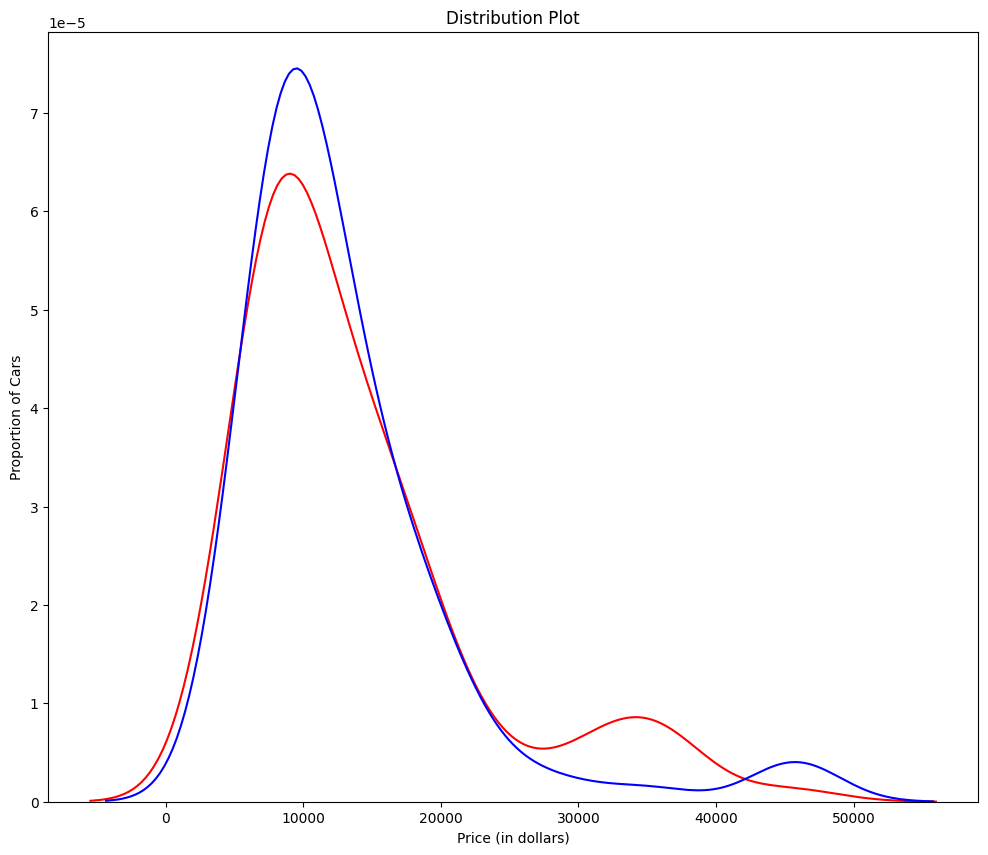

In [30]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

# A01793599 - Utilizando predict y la función DistributionPlot
yhat_test1 = poly1.predict(xTestPr1)

DistributionPlot(y_test, yhat_test1, "Valores actuales", "Valores de predicción", "Distribution Plot")

Question 4f - Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.

El modelo no parece ser muy preciso principalmente en el rango de los 30,000 ni en los 10,000.

Question 5 - Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.

In [31]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

regresionRidge  = Ridge(alpha=10) 
regresionRidge.fit(x_train_pr, y_train)
print("Score de Ridge: " + str(regresionRidge.score(x_test_pr, y_test)))

Score de Ridge: 0.5418576440206373
